In [2]:
import pandas as pd
import numpy as np
from statwolfml import Builder
from ACME import ACME 

In [3]:
dataset = pd.read_csv('dataset/wine.csv',sep=';')

In [4]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [18]:
dataset = dataset.rename(columns={'quality':'target'})

In [19]:
qt_features = dataset.drop(columns='target').columns.to_list()

In [21]:
from data_science.modules.encoding import create as createENC

In [22]:
model= 'random_forest_regressor'
build_model = Builder(model).feature_names(qt_features).labels(['target']).build()
train_model = build_model.train(dataset)

In [23]:
model = train_model.base_model()['model']

In [24]:
acme_rf = ACME(model, 'target', quantitative_features=qt_features ,K=20, task = 'r')

In [25]:
acme_rf = acme_rf.fit(dataset)

In [26]:
acme_rf.summary_plot()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


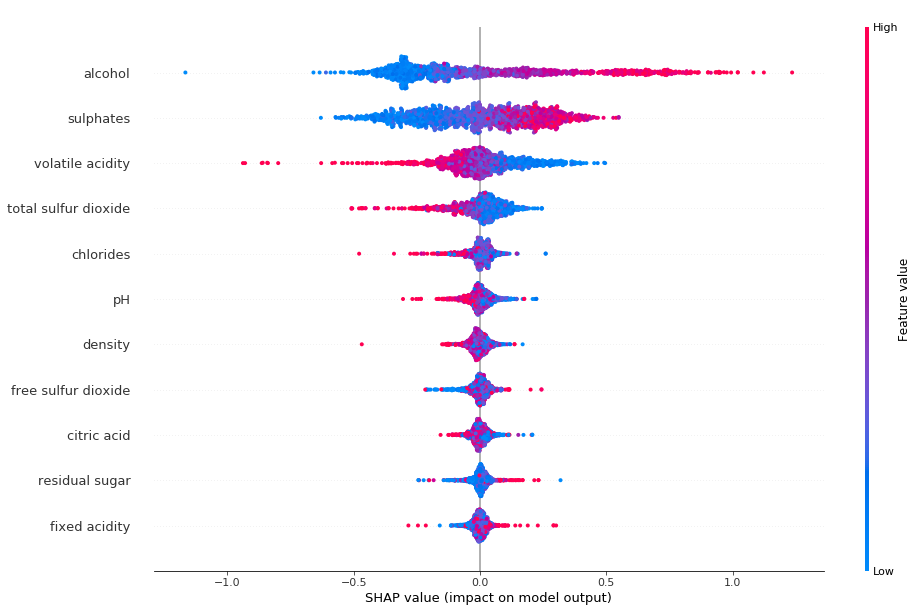

In [27]:
import shap
explainer = shap.TreeExplainer(train_model.base_model()['model'])
shap_values = explainer.shap_values(dataset.drop(columns='target'))
shap.summary_plot(shap_values,dataset.drop(columns=['target']),plot_size=(15,10))

In [28]:
acme_rf.bar_plot()

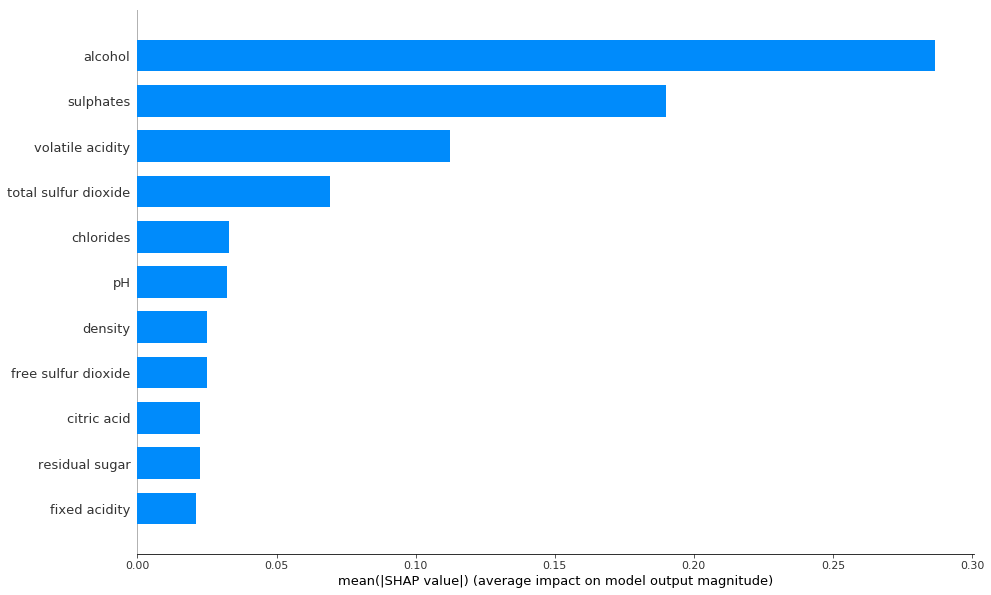

In [29]:
shap.summary_plot(shap_values,dataset.drop(columns=['target']),plot_type='bar',plot_size=(15,10))

In [30]:
from data_science.modules.feature_importance import create as createFI
createFI().random_forest_output(train_model,dataset.drop(columns='target').columns).dataframe()

,weight,std,lower,upper
alcohol,0.276881,0.026893,0.271610,0.282152
sulphates,0.138135,0.023704,0.133489,0.142781
volatile acidity,0.122644,0.026349,0.117480,0.127809
total sulfur dioxide,0.080120,0.016556,0.076875,0.083365
chlorides,0.063696,0.014043,0.060944,0.066449
pH,0.059839,0.015621,0.056778,0.062901
residual sugar,0.057498,0.013601,0.054833,0.060164
density,0.052908,0.014580,0.050051,0.055766
fixed acidity,0.050852,0.015488,0.047817,0.053888
citric acid,0.049683,0.017943,0.046166,0.053200
